### Detect Data Drift using Kolmogorov-Smirnov Test
**Description**: Use statistical tests to detect data drift between two datasets.

In [ ]:
# write your code from here

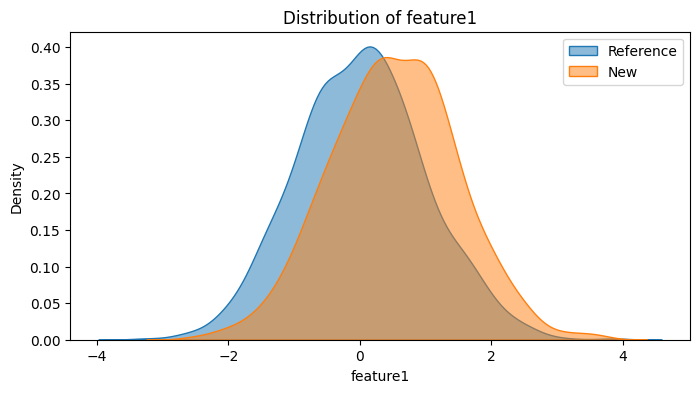

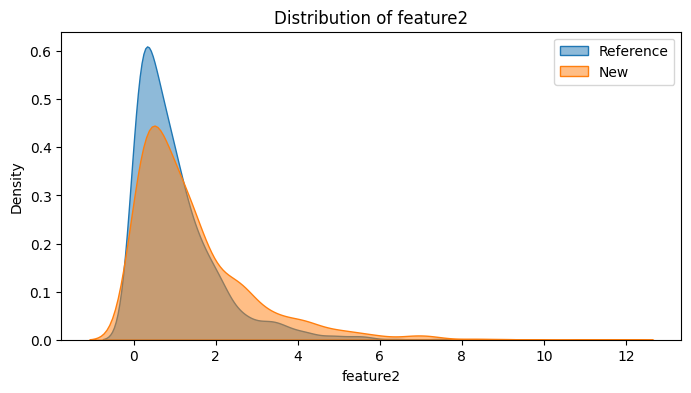

Kolmogorov–Smirnov Test Results:

feature1: KS-stat = 0.2140, p-value = 0.0000 → Drift Detected
feature2: KS-stat = 0.1430, p-value = 0.0000 → Drift Detected


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated datasets
np.random.seed(42)

# Reference dataset
reference_data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.exponential(1, 1000)
})

# New dataset with drift
new_data = pd.DataFrame({
    'feature1': np.random.normal(0.5, 1, 1000),     # mean shifted
    'feature2': np.random.exponential(1.5, 1000)    # scale changed
})

# Visualize distributions
for feature in reference_data.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(reference_data[feature], label='Reference', fill=True, alpha=0.5)
    sns.kdeplot(new_data[feature], label='New', fill=True, alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

# KS test for data drift detection
print("Kolmogorov–Smirnov Test Results:\n")
for feature in reference_data.columns:
    stat, p_value = ks_2samp(reference_data[feature], new_data[feature])
    drift_detected = "Drift Detected" if p_value < 0.05 else "No Drift"
    print(f"{feature}: KS-stat = {stat:.4f}, p-value = {p_value:.4f} → {drift_detected}")
